**Principal Component Analysis (PCA)** is widely used in Machine Learning pipelines as a means to compress data or help visualization. This notebook aims to walk through the basic idea of the PCA and build the algorithm from scratch in Python.

Before diving directly into the PCA, let's first talk about several import concepts - the **"eigenvectors & eigenvalues"** and **"Singular Value Decomposition (SVD)"**.

An **eigenvector** of a square matrix is a column vector that satisfies:

$$Av=\lambda v$$

Where A is a $[n\times n]$ square matrix, v is a $[n\times 1]$ **eigenvector**, and $\lambda$ is a scalar value which is also known as the **eigenvalue**.

If A is both a square and symmetric matrix (like a typical variance-covariance matrix), then we can write A as:

$$A=U\Sigma U^T$$

Here columns of matrix U are eigenvectors of matrix A; and $\Sigma$ is a diaonal matrix containing the corresponding eigenvalues. 

This is also a special case of the well-known theorem **"Singular Value Decomposition" (SVD)**, where a rectangular matrix M can be expressed as:

$$M=U\Sigma V^T$$

####With SVD, we can calcuate the eigenvectors and eigenvalues of a square & symmetric matrix. This will be the key to solve the PCA. 

The goal of the PCA is to find a lower dimension surface to maxmize total variance of the projection, or in other means, to minimize the projection error. The entire algorithm can be summarized as the following:

1) Given a data matrix **$X$** with **$m$** rows (number of records) and **$n$** columns (number of dimensions), we should first substract the column mean for each dimension.

2) Then we can calculate the variance-covariance matrix using the equation (X here already has zero mean for each column from step 1):

$$cov=\frac{1}{m}X^TX$$

3) We can then use SVD to compute the eigenvectors and corresponding eigenvalues of the above covariance matrix "$cov$":

$$cov=U\Sigma U^T$$

4) If our target dimension is $p$ ($p<n$), then we will select the first $p$ columns of the $U$ matrix and get matrix $U_{reduce}$.

5) To get the compressed data set, we can do the transformation as below:

$$X_{reduce}=XU_{reduce}$$

6) To appoximate the original data set given the compressed data, we can use:

$$X=X_{reduce}U_{reduce}^T$$

Note this is true because $U_{reduce}^{-1}=U_{reduce}^T$ (in this case, all the eigenvectors are unit vectors).

####In practice, it is also important to choose the proper number of principal components. For data compression, we want to retain as much variation in the original data while reducing the dimension. Luckily, with SVD, we can get a estimate of the retained variation by:

$$\frac{\sum_{i=1}^{p}S_{ii}}{\sum_{i=1}^{n}S_{ii}}$$

Where $S_{ii}$ is the $ith$ diagonal element of the $\Sigma$ matrix, $p$ is the number of reduced dimension, and $n$ is the dimension of the original data.

####For data visulization purposes, we usually choose 2 or 3 dimensions to plot the compressed data.

####The following class PCA() implements the idea of principal component analysis.

In [1]:
import numpy as np

class PCA():

    def __init__(self, num_components):

        self.num_components = num_components
        self.U = None
        self.S = None

    def fit(self, X):

        # perform pca
        m = X.shape[0]
        X_mean = np.mean(X, axis=0)
        X -= X_mean
        cov = X.T.dot(X) * 1.0 / m
        self.U, self.S, _ = np.linalg.svd(cov)

        return self

    def project(self, X):

        # project data based on reduced dimension
        U_reduce = self.U[:, :self.num_components]
        X_reduce =  X.dot(U_reduce)

        return X_reduce

    def inverse(self, X_reduce):

        # recover the original data based on the reduced form
        U_reduce = self.U[:, :self.num_components]
        X = X_reduce.dot(U_reduce.T)

        return X

    def explained_variance(self):

        # print the ratio of explained variance with the pca
        explained = np.sum(self.S[:self.num_components])
        total = np.sum(self.S)

        return explained * 1.0 / total

####Now we can use a demo data set to show dimensionality reduction and data visualization. 

We will use the Iris Data set as always.

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

X = iris['data']
y = iris['target']

print X.shape

(150L, 4L)


We can find that the dimension of the original $X$ matrix is 4. We can then compress it to 2 using PCA technique with the **PCA()** class that we defined above.

In [3]:
pca = PCA(num_components=2)
pca.fit(X)

X_reduce = pca.project(X)
print X_reduce.shape

(150L, 2L)


Now that the data has been compressed, we can check the ratianed variance.

In [4]:
print "{:.2%}".format(pca.explained_variance())

97.76%


We have 97.76% of variance retained. This is okay for data visulization purposes. But if we used PCA in supervised learning pipelines, we might want to add more dimension to keep more than 99% of the variation from the original data.

Finally, with the compressed dimension, we can plot to see the distribution of iris dataset.

Populating the interactive namespace from numpy and matplotlib


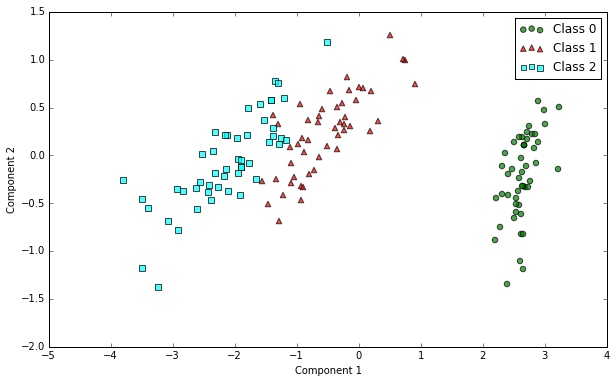

In [5]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

from matplotlib import pyplot as plt

for c, marker, class_num in zip(['green', 'r', 'cyan'], ['o', '^', 's'], np.unique(y)):

    plt.scatter(x=X_reduce[:, 0][y == class_num], y=X_reduce[:, 1][y == class_num], c=c, marker=marker,
                label="Class {}".format(class_num), alpha=0.7, s=30)


plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.legend()

plt.show()

From the above example, we can see that PCA can help us visualize data with more than 3 feature dimensions. The general use of PCA is for dimensionality reductions in Machine Learning Pipelines. It can speed up the learning process and save memory when running supervised and unsupervised algorithms on large dataset. However, it also throws away some information when reducing the feature dimension. Thus it is always beneficial to test whether using PCA on top of something else since it's pretty easy to set up.